In [187]:
'''
Random Forest:
It is a supervised learning algorithm used for both classification and regression type of problems
It creates multiple decision trees, gets prediction from each tree and selects the best solution by means of voting
accurate and robust model
takes the average of all the predictions made by the decision-trees.So, it does not suffer from the overfitting problem.
More complex and difficult to interpret
Decision-trees are computationally faster as compared to random forests

'''

'\nRandom Forest:\nIt is a supervised learning algorithm used for both classification and regression type of problems\nIt creates multiple decision trees, gets prediction from each tree and selects the best solution by means of voting\naccurate and robust model\ntakes the average of all the predictions made by the decision-trees.So, it does not suffer from the overfitting problem.\nMore complex and difficult to interpret\nDecision-trees are computationally faster as compared to random forests\n\n'

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

In [189]:
data='/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df = pd.read_csv(data, header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [190]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [191]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [193]:
for col in col_names:
    print(f'Columns Name: {col}')
    print(df[col].value_counts())  
    print('================================')

Columns Name: buying
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Columns Name: maint
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Columns Name: doors
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Columns Name: persons
persons
2       576
4       576
more    576
Name: count, dtype: int64
Columns Name: lug_boot
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
Columns Name: safety
safety
low     576
med     576
high    576
Name: count, dtype: int64
Columns Name: class
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [194]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [195]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [196]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [197]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['buying']=le.fit_transform(df['buying'])
df['maint']=le.fit_transform(df['maint'])
df['doors']=le.fit_transform(df['doors'])
df['persons']=le.fit_transform(df['persons'])
df['lug_boot']=le.fit_transform(df['lug_boot'])
df['safety']=le.fit_transform(df['safety'])

In [198]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc


In [199]:
x = df.drop(['class'], axis=1)
y = df['class']

In [200]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [201]:
x_train.shape, x_test.shape

((1157, 6), (571, 6))

In [202]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)   # default parameter of n_estimators = 10

# fit the model
rfc.fit(x_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(x_test)

In [203]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9545


In [204]:
#parameter n_estimators=100 
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model
rfc_100.fit(x_train, y_train)

# Predict the Test set results
y_pred_100 = rfc_100.predict(x_test)

In [205]:
#accuracy
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9545


In [206]:
'''
expected accuracy is same with 10 decision trees and 100 decision-trees in the model
'''

'\nexpected accuracy is same with 10 decision trees and 100 decision-trees in the model\n'

In [207]:
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [208]:
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

safety      0.265392
persons     0.222230
buying      0.201751
maint       0.154568
lug_boot    0.089286
doors       0.066773
dtype: float64

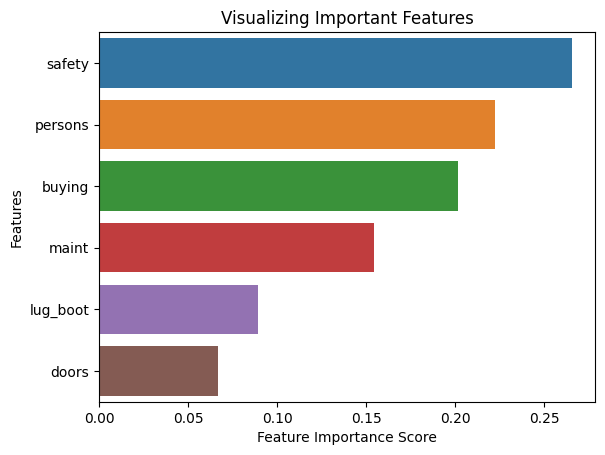

In [209]:
#visualization
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()


In [210]:
#The most important feature is safety and least important feature is doors
x.drop(['doors'],axis=1,inplace=True)

In [211]:
x

,buying,maint,persons,lug_boot,safety
0,3,3,0,2,1
1,3,3,0,2,2
2,3,3,0,2,0
3,3,3,0,1,1
4,3,3,0,1,2
...,...,...,...,...,...
1723,1,1,2,1,2
1724,1,1,2,1,0
1725,1,1,2,0,1
1726,1,1,2,0,2


In [212]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(x_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(x_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9545


In [213]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[113   7   8   1]
 [  1  18   0   1]
 [  5   0 392   0]
 [  3   0   0  22]]


In [214]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.93      0.88      0.90       129
        good       0.72      0.90      0.80        20
       unacc       0.98      0.99      0.98       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.95       571
   macro avg       0.89      0.91      0.90       571
weighted avg       0.96      0.95      0.95       571

